In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Train and Test datasets:

data_train = pd.read_excel("C:/Users/Sadyo/Desktop/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")

data_test = pd.read_excel("C:/Users/Sadyo/Desktop/Flight_Ticket_Participant_Datasets/Test_set.xlsx")

In [3]:
# checking the shape of the data :

data_train.shape

(10683, 11)

In [4]:
# checking the shape of the test data :

data_test.shape

(2671, 10)

In [5]:
# extracting information about datasets:

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [7]:
# Checking the NULL values:

data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# as the number of observations in our dataset is large enough, so dropping 2 observations would not affect out study:

data_train.dropna(inplace = True)

In [9]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
# checking the type of data present in our datasets:

data_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
data_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [12]:
# Changing the datatype of date columns:

def change_into_datetime(col):
    data_train[col] = pd.to_datetime(data_train[col])
   
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)     


In [13]:
data_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
# Changing the datatype of date columns of test dataset:

def change_into_datetime(col):
    data_test[col] = pd.to_datetime(data_test[col])
   
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)     


In [15]:
data_test.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

In [16]:
# splitting the dates into three columns : date, month, year

data_train['Jrny_date'] = data_train['Date_of_Journey'].dt.day
data_train['Jrny_month'] = data_train['Date_of_Journey'].dt.month
data_train['Jrny_year'] = data_train['Date_of_Journey'].dt.year

In [17]:
# splitting the dates into three columns : date, month, year in our test dataset:

data_test['Jrny_date'] = data_test['Date_of_Journey'].dt.day
data_test['Jrny_month'] = data_test['Date_of_Journey'].dt.month
data_test['Jrny_year'] = data_test['Date_of_Journey'].dt.year

In [18]:
# checking the data format:

data_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jrny_date,Jrny_month,Jrny_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-20 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-20 05:50:00,2021-06-20 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [19]:
data_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Jrny_date,Jrny_month,Jrny_year
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-06-20 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-06-20 06:20:00,2021-06-20 10:20:00,4h,1 stop,No info,5,12,2019


In [20]:
# dropping the Date of Journey column from datasets as we added seperate columns for Date, Month, and Year:

data_train = data_train.drop(['Date_of_Journey'], axis=1)

In [21]:
data_test = data_test.drop(['Date_of_Journey'], axis=1)

In [22]:
# Defining the funcyion to extract hours and minutes from Dep_Time and Arrival_Time columns:

def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
    
def extract_min(df,col):
    df[col+'_minute']=df[col].dt.minute

In [23]:
# extracting hour and minute from training dataset:

extract_hour(data_train, 'Dep_Time' )
extract_min(data_train, 'Dep_Time' )
extract_hour(data_train, 'Arrival_Time' )
extract_min(data_train, 'Arrival_Time' )

In [24]:
# extracting hour and minute from testing dataset:

extract_hour(data_test, 'Dep_Time' )
extract_min(data_test, 'Dep_Time' )
extract_hour(data_test, 'Arrival_Time' )
extract_min(data_test, 'Arrival_Time' )

Now, we can remove the Dep_Time and Arrival_Time columns from both the datasets:

In [25]:
data_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Jrny_date,Jrny_month,Jrny_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-06-20 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-20 05:50:00,2021-06-20 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [26]:
data_test.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Jrny_date,Jrny_month,Jrny_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2021-06-20 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2021-06-20 06:20:00,2021-06-20 10:20:00,4h,1 stop,No info,5,12,2019,6,20,10,20


#dealing with Duration : seperating the hour and min from Duration column to two other seperate columns:

In [27]:
data_train = data_train.drop(['Arrival_Time','Dep_Time'], axis=1)

In [28]:
data_test = data_test.drop(['Arrival_Time','Dep_Time'], axis=1)

In [29]:
data_train[['Dur_hr','Dur_min','Dur_sec']] = pd.to_timedelta(data_train['Duration']).dt.components.iloc[:, 1:4]

In [30]:
data_test[['Dur_hr','Dur_min','Dur_sec']] = pd.to_timedelta(data_test['Duration']).dt.components.iloc[:, 1:4]

In [31]:
data_train = data_train.drop(['Duration'], axis=1)
data_test = data_test.drop(['Duration'], axis=1)

#dealing with total number of stops in both the datasets:

In [32]:
data_train['Total_Stops']=data_train['Total_Stops'].replace('non-stop','0 stop')
data_train['stop']=data_train['Total_Stops'].str.split(' ').str[0]
data_train['stop']=data_train['stop'].astype(int)

data_test['Total_Stops']=data_test['Total_Stops'].replace('non-stop','0 stop')
data_test['stop']=data_test['Total_Stops'].str.split(' ').str[0]
data_test['stop']=data_test['stop'].astype(int)

In [33]:
# dropping Total_Stops column from both the datasets : 

data_train = data_train.drop(['Total_Stops'], axis=1)
data_test = data_test.drop(['Total_Stops'], axis=1)

In [34]:
# we can also drop the column year as whole the data is of 2019:

data_train = data_train.drop(['Jrny_year'], axis=1)
data_test = data_test.drop(['Jrny_year'], axis=1)

Now, checking the shape and look of both the datasets:

In [35]:
data_train.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Jrny_date,Jrny_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dur_hr,Dur_min,Dur_sec,stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,22,20,1,10,2,50,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,5,1,5,50,13,15,7,25,0,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,6,9,9,25,4,25,19,0,0,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,5,12,18,5,23,30,5,25,0,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,3,1,16,50,21,35,4,45,0,1


In [36]:
data_test.head()

,Airline,Source,Destination,Route,Additional_Info,Jrny_date,Jrny_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dur_hr,Dur_min,Dur_sec,stop
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,No info,6,6,17,30,4,25,10,55,0,1
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,No info,5,12,6,20,10,20,4,0,0,1
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,In-flight meal not included,21,5,19,15,19,0,23,45,0,1
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,No info,21,5,8,0,21,0,13,0,0,1
4,Air Asia,Banglore,Delhi,BLR → DEL,No info,24,6,23,55,2,45,2,50,0,0


In [37]:
data_train.shape

(10682, 16)

In [38]:
data_test.shape

(2671, 15)

Data Vizualization:

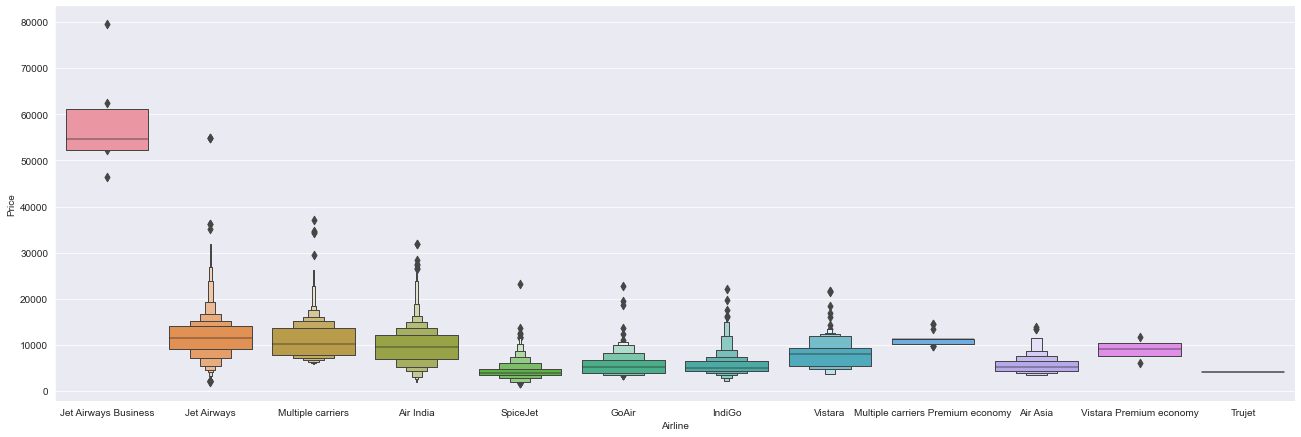

In [39]:
# Airline vs Price

sns.catplot(y = "Price", x = "Airline", data = data_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#From above graph we can observe that Jet Airways Business have the highest Price.

#Apart from the first Airline "Jet Airways Business" almost all are having similar median.

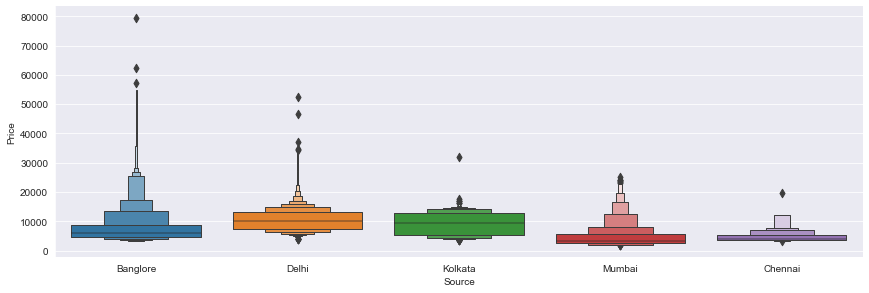

In [40]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = data_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


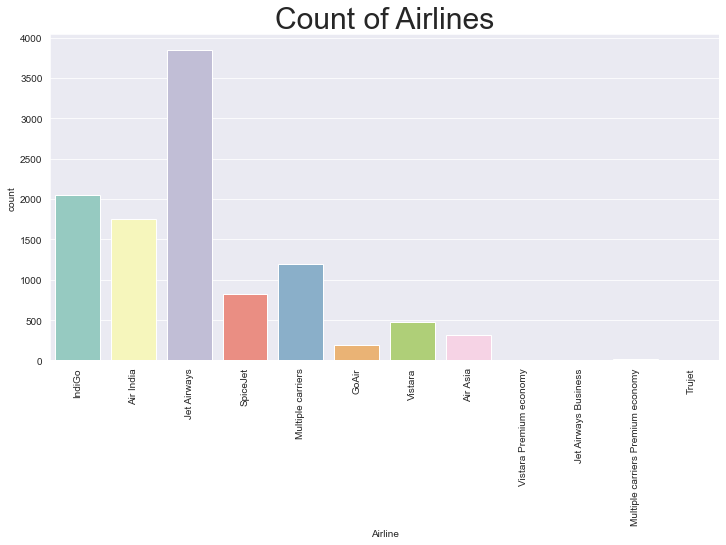

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data_train['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

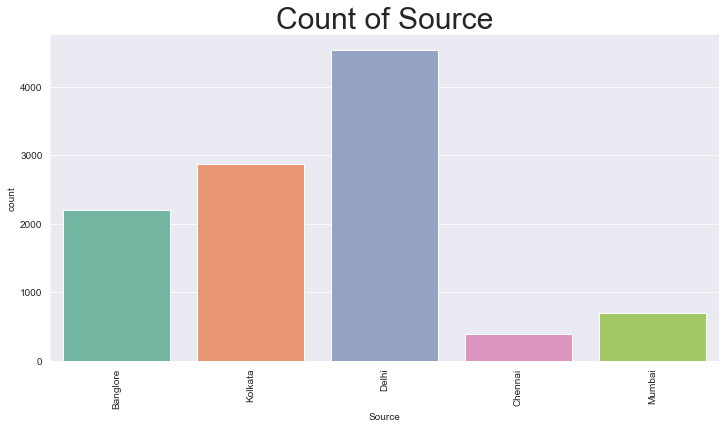

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(data_train['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

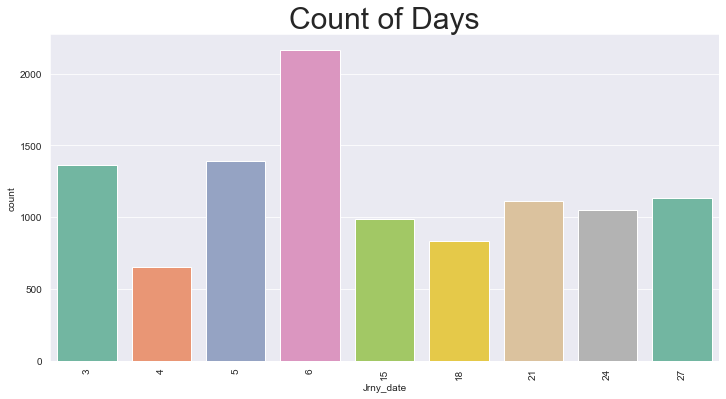

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(data_train['Jrny_date'], palette='Set2')
plt.title('Count of Days', size=30)
plt.xticks(rotation=90)
plt.show()

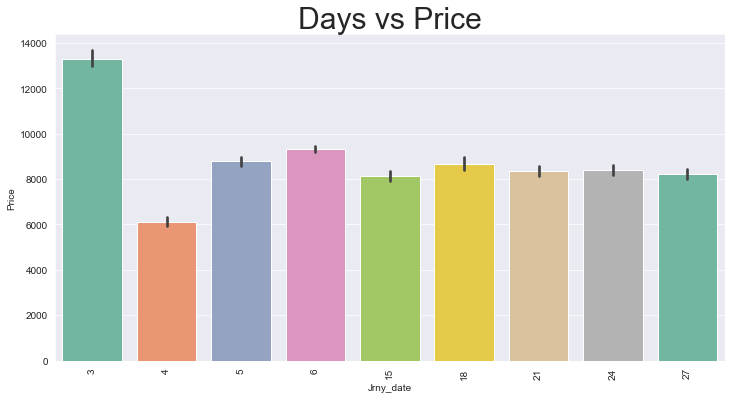

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(data_train['Jrny_date'], data_train['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

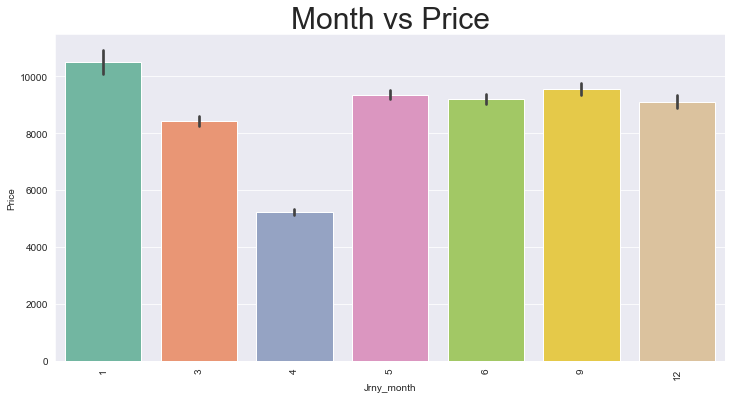

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(data_train['Jrny_month'], data_train['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

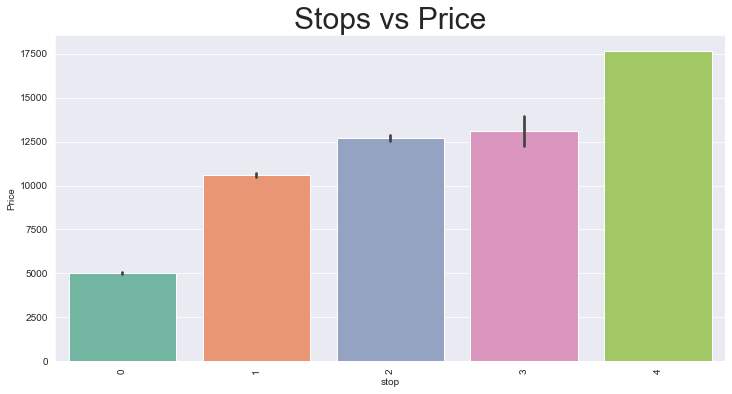

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(data_train['stop'], data_train['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

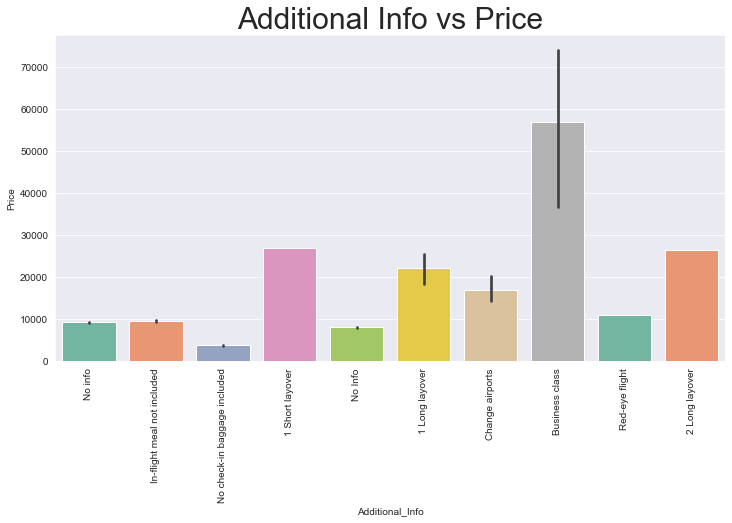

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(data_train['Additional_Info'], data_train['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [47]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1,)
    sns.boxplot(df[col],ax=ax2)

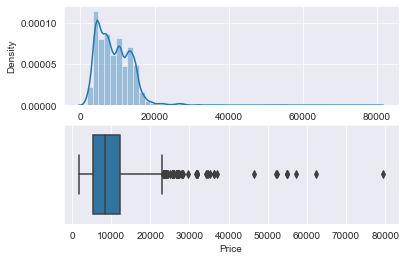

In [48]:
plot(data_train, 'Price')

In [49]:
# removing the outliers

data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

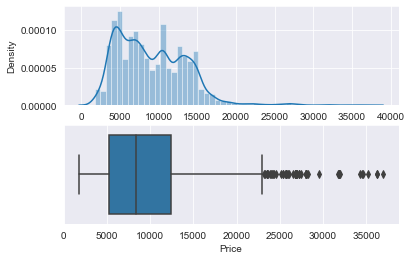

In [50]:
plot(data_train, 'Price')

In [51]:
data_train.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Additional_Info         object
Price                  float64
Jrny_date                int64
Jrny_month               int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Dur_hr                   int64
Dur_min                  int64
Dur_sec                  int64
stop                     int32
dtype: object

Our next task is to convert all the categorical variables into integer one:

In [52]:
# Dealing with Route column:

data_train['Route_1'] = data_train['Route'].str.split('→ ').str[0]
data_train['Route_2'] = data_train['Route'].str.split('→ ').str[1]
data_train['Route_3'] = data_train['Route'].str.split('→ ').str[2]
data_train['Route_4'] = data_train['Route'].str.split('→ ').str[3]
data_train['Route_5'] = data_train['Route'].str.split('→ ').str[4]

In [53]:
# Dealing with Route column:

data_test['Route_1'] = data_test['Route'].str.split('→ ').str[0]
data_test['Route_2'] = data_test['Route'].str.split('→ ').str[1]
data_test['Route_3'] = data_test['Route'].str.split('→ ').str[2]
data_test['Route_4'] = data_test['Route'].str.split('→ ').str[3]
data_test['Route_5'] = data_test['Route'].str.split('→ ').str[4]

In [54]:
data_train.isnull().sum()

Airline                    0
Source                     0
Destination                0
Route                      0
Additional_Info            0
Price                      0
Jrny_date                  0
Jrny_month                 0
Dep_Time_hour              0
Dep_Time_minute            0
Arrival_Time_hour          0
Arrival_Time_minute        0
Dur_hr                     0
Dur_min                    0
Dur_sec                    0
stop                       0
Route_1                    0
Route_2                    0
Route_3                 3491
Route_4                 9116
Route_5                10636
dtype: int64

In [55]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    data_train[i].fillna("None", inplace=True)

In [56]:
data_test.isnull().sum()

Airline                   0
Source                    0
Destination               0
Route                     0
Additional_Info           0
Jrny_date                 0
Jrny_month                0
Dep_Time_hour             0
Dep_Time_minute           0
Arrival_Time_hour         0
Arrival_Time_minute       0
Dur_hr                    0
Dur_min                   0
Dur_sec                   0
stop                      0
Route_1                   0
Route_2                   0
Route_3                 849
Route_4                2280
Route_5                2659
dtype: int64

In [57]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    data_test[i].fillna("None", inplace=True)

In [58]:
# dropping Route column from both the datasets:

data_train = data_train.drop(['Route'], axis=1)
data_test = data_test.drop(['Route'], axis=1)

In [59]:
# Categorical features in our datasets:

categorical_features = ['Airline', 'Source', 'Destination', 'Additional_Info','Route_1','Route_2','Route_3','Route_4','Route_5']

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
# coding the categorical variables in training dataset:


le= LabelEncoder()

data_train['Airline'] = le.fit_transform(data_train['Airline'])
data_train['Source'] = le.fit_transform(data_train['Source'])
data_train['Destination'] = le.fit_transform(data_train['Destination'])
data_train['Additional_Info'] = le.fit_transform(data_train['Additional_Info'])
data_train['Route_1'] = le.fit_transform(data_train['Route_1'])
data_train['Route_2'] = le.fit_transform(data_train['Route_2'])
data_train['Route_3'] = le.fit_transform(data_train['Route_3'])
data_train['Route_4'] = le.fit_transform(data_train['Route_4'])
data_train['Route_5'] = le.fit_transform(data_train['Route_5'])

In [62]:
# coding the categorical variables in testing dataset:

le= LabelEncoder()

data_test['Airline'] = le.fit_transform(data_test['Airline'])
data_test['Source'] = le.fit_transform(data_test['Source'])
data_test['Destination'] = le.fit_transform(data_test['Destination'])
data_test['Additional_Info'] = le.fit_transform(data_test['Additional_Info'])
data_test['Route_1'] = le.fit_transform(data_test['Route_1'])
data_test['Route_2'] = le.fit_transform(data_test['Route_2'])
data_test['Route_3'] = le.fit_transform(data_test['Route_3'])
data_test['Route_4'] = le.fit_transform(data_test['Route_4'])
data_test['Route_5'] = le.fit_transform(data_test['Route_5'])

In [63]:
pd.set_option('display.max_columns', None)

In [64]:
data_train.head()

,Airline,Source,Destination,Additional_Info,Price,Jrny_date,Jrny_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dur_hr,Dur_min,Dur_sec,stop,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,22,20,1,10,2,50,0,0,0,13,24,12,4
1,1,3,0,8,7662.0,5,1,5,50,13,15,7,25,0,2,2,25,1,3,4
2,4,2,1,8,13882.0,6,9,9,25,4,25,19,0,0,2,3,32,4,5,4
3,3,3,0,8,6218.0,5,12,18,5,23,30,5,25,0,1,2,34,3,12,4
4,3,0,5,8,13302.0,3,1,16,50,21,35,4,45,0,1,0,34,8,12,4


In [65]:
data_test.head()

,Airline,Source,Destination,Additional_Info,Jrny_date,Jrny_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dur_hr,Dur_min,Dur_sec,stop,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,5,6,6,17,30,4,25,10,55,0,1,3,7,5,8,3
1,3,3,0,5,5,12,6,20,10,20,4,0,0,1,2,29,3,8,3
2,4,2,1,3,21,5,19,15,19,0,23,45,0,1,3,7,5,8,3
3,6,2,1,5,21,5,8,0,21,0,13,0,0,1,3,7,5,8,3
4,0,0,2,5,24,6,23,55,2,45,2,50,0,0,0,13,21,8,3


FEATURE SELECTION:

=> In data preprocessing our target is to convert raw data into its most presentable and effective form. => In this section, we find the most affecting variables out of all the variables available in our dataset. We will keep the most significant variables (predictors) in our data set and leave the other.

Seperating the data into dependent(target) and independent(predictor) variables:

In [66]:
y_train = data_train['Price']
y_train

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [67]:
x_train = data_train.drop(['Price'], axis=1)
x_train.head()

,Airline,Source,Destination,Additional_Info,Jrny_date,Jrny_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dur_hr,Dur_min,Dur_sec,stop,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,24,3,22,20,1,10,2,50,0,0,0,13,24,12,4
1,1,3,0,8,5,1,5,50,13,15,7,25,0,2,2,25,1,3,4
2,4,2,1,8,6,9,9,25,4,25,19,0,0,2,3,32,4,5,4
3,3,3,0,8,5,12,18,5,23,30,5,25,0,1,2,34,3,12,4
4,3,0,5,8,3,1,16,50,21,35,4,45,0,1,0,34,8,12,4


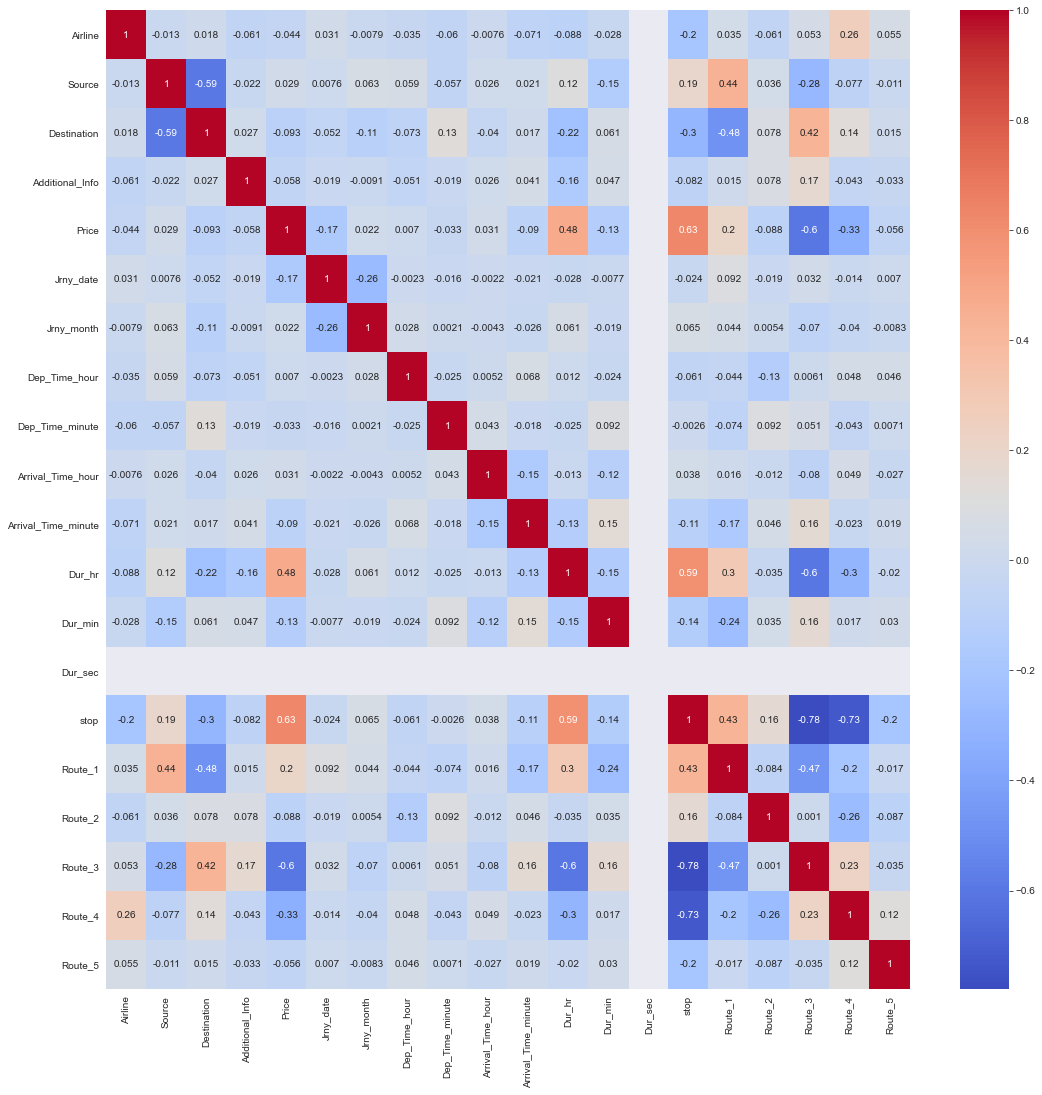

In [68]:
# Heatmap

# Finding the correlation between Independent and dependent variables:

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [69]:
x_train.columns

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Jrny_date',
       'Jrny_month', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dur_hr', 'Dur_min', 'Dur_sec', 'stop',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [70]:
x_train.shape

(10682, 19)

In [71]:
data_test.shape

(2671, 19)

In [72]:
# using mutual info classifier:

from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(x_train, y_train)

array([2.58812891e+00, 2.41555955e+00, 2.41860112e+00, 2.14676004e+00,
       1.04684644e+00, 8.49499101e-01, 1.41725495e+00, 1.21304494e+00,
       1.84353561e+00, 1.52369196e+00, 1.56186317e+00, 1.06446292e+00,
       2.44260309e-03, 2.14324348e+00, 2.02337468e+00, 2.80983085e+00,
       2.19323006e+00, 1.08680787e+00, 1.71661685e+00])

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [74]:
# sorting the variables in order of their importance:

imp = pd.DataFrame(mutual_info_classif(x_train, y_train), index = x_train.columns)
imp.columns = ['importance']
imp.sort_values(by = 'importance', ascending = False)

,importance
Route_2,2.801477
Airline,2.577131
Destination,2.443371
Source,2.382861
Route_3,2.209176
stop,2.150778
Additional_Info,2.141634
Route_1,2.046259
Arrival_Time_hour,1.849163
Route_5,1.805232


From above we can observe that Route_2, Airline, Destination, Source, stop, Route_3 are the predictors which are most affecting the target variable. and Also we can see that Dur_sec has least affect or relationship with the target variable which can also be observed fom Heatmap, so we can drop this column.

In [77]:
x_train = x_train.drop(['Dur_sec'], axis=1)

In [78]:
x_test = data_test.drop(['Dur_sec'], axis=1)

In [76]:
x_test = data_test

In [78]:
x_train.shape

(10682, 19)

In [79]:
x_train.head()

,Airline,Source,Destination,Additional_Info,Jrny_date,Jrny_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dur_hr,Dur_min,Dur_sec,stop,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,24,3,22,20,1,10,2,50,0,0,0,13,24,12,4
1,1,3,0,8,5,1,5,50,13,15,7,25,0,2,2,25,1,3,4
2,4,2,1,8,6,9,9,25,4,25,19,0,0,2,3,32,4,5,4
3,3,3,0,8,5,12,18,5,23,30,5,25,0,1,2,34,3,12,4
4,3,0,5,8,3,1,16,50,21,35,4,45,0,1,0,34,8,12,4


In [80]:
x_test.shape

(2671, 19)

In [81]:
x_test.head()

,Airline,Source,Destination,Additional_Info,Jrny_date,Jrny_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Dur_hr,Dur_min,Dur_sec,stop,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,5,6,6,17,30,4,25,10,55,0,1,3,7,5,8,3
1,3,3,0,5,5,12,6,20,10,20,4,0,0,1,2,29,3,8,3
2,4,2,1,3,21,5,19,15,19,0,23,45,0,1,3,7,5,8,3
3,6,2,1,5,21,5,8,0,21,0,13,0,0,1,3,7,5,8,3
4,0,0,2,5,24,6,23,55,2,45,2,50,0,0,0,13,21,8,3


Now our data is ready for Model Fitting

In [82]:
from sklearn import metrics

In [83]:
y_test = pd.read_excel("C:/Users/Sadyo/Desktop/Flight_Ticket_Participant_Datasets/ytest.xlsx")

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rfr = RandomForestRegressor()
model = rfr.fit(x_train, y_train)
y_prediction = model.predict(x_test)
y_prediction

array([10831.28 ,  4367.31 , 12943.9  , ..., 15262.415, 13698.82 ,
       10479.19 ])

In [86]:
def predict(ml_model):
    model = ml_model.fit(x_train, y_train)
    print('Training Score : {}'.format(model.score(x_train, y_train)))
    y_prediction = model.predict(x_test)
    print('Predictions are:\n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score is: {}'.format(r2_score))
    
    print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
    print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
    print('RSME:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))  
 

In [87]:
predict(RandomForestRegressor())

Training Score : 0.9846160780914411
Predictions are:
 [10685.15        4386.59       12930.27       ... 15106.92
 13615.05833333 11236.81      ]


r2 score is: -5.576068069947027
MAE: 11260.793880040173
MSE: 164695266.56929618
RSME: 12833.36536413174


In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [91]:
models = [['LinearRegression : ', LinearRegression()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['SVR : ', SVR()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()]]
          

In [92]:
for name, model in models:
    model=model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

LinearRegression :  13482.635487696043
Lasso :  13372.897320983564
Ridge :  13462.206719105838
KNeighborsRegressor :  12894.073310624262
DecisionTreeRegressor :  13396.687807996654
RandomForestRegressor :  12965.237421312853
SVR :  12862.44946899423
GradientBoostingRegressor :  12686.451703281193
